In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from datetime import datetime, date
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
# import modin.pandas as pd
# import modin
import pandas as pd
from scipy.optimize import minimize 
from utils import *
from importlib import reload
from collections import defaultdict

import matplotlib.font_manager as fm

In [4]:
fm.fontManager.addfont("/Users/lcota/Library/Fonts/Raleway-Regular.ttf")
fm.fontManager.addfont("/Users/lcota/Library/Fonts/Raleway-Light.ttf")

In [5]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Raleway'
plt.rcParams['font.style'] = "normal"
# plt.rcParams['font.weight'] = 'Light'
# plt.rcParams['font.serif'] = 'Times New Roman'
# plt.rcParams['font.size'] = 12
# font.cursive
# font.family
# font.fantasy
# font.monospace
# font.sans-serif
# font.serif
# font.size
# font.stretch
# font.style
# font.variant
# font.weight
# legend.fontsize
# legend.title_fontsize
# mathtext.fontset
# pdf.fonttype
# pdf.use14corefonts
# pgf.rcfonts
# ps.fonttype
# svg.fonttype

# plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, rtn_col=rtn_col, 
#                   weights=weights, save_plot=True, show_plot=True)

# for k in plt.rcParams.keys():
#     if "font" in k:
#         print(k)

In [6]:
import strategies

In [7]:
from strategies import calc_excess_returns, factor_barplot, portfolio_performance, negative_sharpe_ratio, optimize_portfolio, calculate_factor_exposures, calculate_factor_exposures2, calc_strat_returns

In [6]:
# dfcpi_fred = pd.read_parquet("workspace/cpi_fred_factors.pq").reset_index()/

In [8]:
dfcpi = pd.read_parquet("workspace/cpi_turnleaf_factors.pq").reset_index()
dfcpi['date'] = dfcpi['refdate'].apply(lambda x: date(x.year, x.month, 1))

,refmonthyear,index,pubdate,refdate,cpi.pubdate,cpi.refdate,cpi.realised,cpi.1mf.yoy,cpi.3mf.yoy,cpi.6mf.yoy,...,cpi.12mf.yoy,3m1m_rising_yoy,6m1m_rising_yoy,9m1m_rising_yoy,12m1m_rising_yoy,3m_rising_yoy,6m_rising_yoy,9m_rising_yoy,12m_rising_yoy,date
0,JAN.2013,0,2013-02-26,2013-01-31,2013-02-21,2013-01-31,1.594865,1.541966,1.207702,2.134584,...,3.568,False,True,True,True,False,True,True,True,2013-01-01
1,FEB.2013,1,2013-03-20,2013-02-28,2013-03-15,2013-02-28,1.977924,1.474452,1.611961,2.126072,...,3.375,True,True,True,True,False,True,True,True,2013-02-01
2,MAR.2013,2,2013-04-19,2013-03-31,2013-04-16,2013-03-31,1.473896,1.178381,1.544404,1.913064,...,2.957,True,True,True,True,True,True,True,True,2013-03-01
3,APR.2013,3,2013-05-21,2013-04-30,2013-05-16,2013-04-30,1.063085,1.361924,2.045935,1.936189,...,3.497,True,True,True,True,True,True,True,True,2013-04-01
4,MAY.2013,4,2013-06-21,2013-05-31,2013-06-18,2013-05-31,1.361965,1.669177,1.748812,2.522877,...,3.303,True,True,True,True,True,True,True,True,2013-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,AUG.2023,127,2023-09-15,2023-08-31,2023-09-15,2023-08-31,3.665112,3.642274,3.348538,2.159319,...,2.031,False,False,False,False,False,False,False,False,2023-08-01
128,SEP.2023,128,2023-10-16,2023-09-30,2023-10-16,2023-09-30,3.699698,3.330315,3.596727,2.981788,...,2.343,True,False,False,False,False,False,False,False,2023-09-01
129,OCT.2023,129,2023-11-17,2023-10-31,2023-11-17,2023-10-31,3.241145,3.234947,3.406128,3.124952,...,2.993,True,False,False,False,True,False,False,False,2023-10-01
130,NOV.2023,130,2023-12-15,2023-11-30,2023-12-15,2023-11-30,3.137271,3.343155,2.741241,2.529372,...,1.992,False,False,False,False,False,False,False,False,2023-11-01


In [9]:
df_all = pd.read_parquet("workspace/dfreturns_with_tlfactors.pq")
df_all['year'] = df_all['date'].apply(lambda x: pd.to_datetime(x).date().year)
mask = (df_all['year'] >= 2013) & (df_all['year'] <= 2024)
df_all = df_all[mask].copy()

In [10]:
df_all

,refmonthyear,ticker,date,nmi.hml,pmi.hml,cpi.hml,rtn,rtn_date,3m1m_rising_yoy,6m1m_rising_yoy,...,rtn_4M,rtn_5M,rtn_6M,rtn_7M,rtn_8M,rtn_9M,rtn_10M,rtn_11M,rtn_12M,year
279,JAN.2013,s5cond,2013-01-31,MED,MED,MED,0.056941,2013-01-31,False,True,...,0.006581,0.003808,0.011692,0.008648,0.012536,0.014692,0.014799,0.016159,0.020656,2013
280,FEB.2013,s5cond,2013-02-28,MED,MED,MED,0.011436,2013-02-28,True,True,...,0.025288,0.026931,0.038233,0.041039,0.037853,0.043380,0.044992,0.040618,0.033102,2013
281,MAR.2013,s5cond,2013-03-29,MED,MED,MED,0.049090,2013-03-29,True,True,...,-0.003384,-0.007418,0.003316,0.000876,0.012416,0.021147,0.026106,-0.000231,0.013717,2013
282,APR.2013,s5cond,2013-04-30,MED,MED,MED,0.029984,2013-04-30,True,True,...,0.020375,0.028426,0.030331,0.031619,0.040017,0.040101,0.050618,0.056565,0.044424,2013
283,MAY.2013,s5cond,2013-05-31,MED,MED,MED,0.028056,2013-05-31,True,True,...,-0.005234,0.012796,0.009685,0.000059,-0.010654,0.006894,0.004327,0.009538,0.019922,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3730,DEC.2023,spx,2023-12-29,LOW,LOW,NaN,0.045311,2023-12-29,False,False,...,-0.015016,-0.001095,-0.002430,0.003238,0.002600,0.003439,-0.000290,-0.005885,0.002939,2023
3731,JAN.2024,spx,2024-01-31,MED,MED,NaN,0.016794,2024-01-31,None,None,...,0.022547,0.030990,0.031709,0.037731,0.036758,0.022705,0.032694,0.038939,0.034114,2024
3732,FEB.2024,spx,2024-02-29,LOW,LOW,NaN,0.053395,2024-02-29,None,None,...,0.001858,0.012320,0.005781,0.004656,0.015943,0.014029,0.011366,0.004844,0.011203,2024
3733,MAR.2024,spx,2024-03-29,LOW,MED,NaN,0.032174,2024-03-29,None,None,...,-0.020189,-0.009310,-0.009666,-0.008091,-0.017453,-0.016327,-0.007719,-0.010497,-0.013520,2024


In [85]:
factor_cols = ['date', 'refmonthyear', 'cpi.hml', 'pmi.hml', 'nmi.hml']

cpi_factors = ['date', 'refmonthyear', 
               '3m_rising_yoy', '6m_rising_yoy', '9m_rising_yoy', '12m_rising_yoy', 
               '3m1m_rising_yoy', '6m1m_rising_yoy', '9m1m_rising_yoy', '12m1m_rising_yoy']

rtn_cols = [c for c in df_all.columns if c.startswith('rtn') & c.endswith("M")]
tickers = list(df_all['ticker'].unique())

# Need to unstack returns per sector to split factor columns
dfrtn = df_all.pivot(columns="ticker", index=['date', 'refmonthyear'], values=rtn_cols)
head(dfrtn)

dfX = df_all[factor_cols].copy().drop_duplicates()
dfX.set_index(['date', 'refmonthyear'], inplace=True)



dfXcpi = dfcpi[cpi_factors].copy().drop_duplicates()
dfXcpi.set_index(['date', 'refmonthyear'], inplace=True)

fwd_returns = {}

df2 = dfrtn.stack(future_stack=True)
df2.reset_index(inplace=True)

for ticker in tickers:
    fwd_returns[ticker] = df2[df2['ticker'] == ticker].copy()

del df2

# Trading Rule Return Functions

In [ ]:
def get_weight(ticker, sigval, weights):
    if sigval is None:
        return 0
    return weights[sigval][ticker]
    
def zero():
    return 0

In [59]:
def apply_trading_rule(dfX, dfrtn, xcol, rtn_col, weights):
    tickers = dfrtn[rtn_col].columns.values
    
    # strat_code = f"totrtn.{xcol}.{rtn_col}"
    
    dfjoint = pd.merge(dfrtn[rtn_col].reset_index(), 
                       dfX[xcol].reset_index(), 
                       left_on='refmonthyear', 
                       right_on='refmonthyear', 
                       suffixes=('', '_y'),
                       how='inner').dropna()
    dfjoint = dfjoint[dfjoint[xcol] != None]    
    
    for ticker in tickers:
        wgtcol = f"wgt.{ticker}" 
        wgtrtncol = f"wgtrtn.{ticker}" 
        dfjoint[wgtcol] = dfjoint[xcol].apply(lambda x: get_weight(ticker, x, weights))
        dfjoint[wgtrtncol] = dfjoint[wgtcol] * dfjoint[ticker]
    
    wgtreturns = dfjoint[[c for c in dfjoint.columns if c.startswith('wgtrtn')]].copy()
    # wgtreturns[strat_code] = np.cumprod(wgtreturns.agg(func='sum', axis='columns').apply(lambda x: 1+x)) * 100
    wgtreturns['totrtn'] = np.cumprod(wgtreturns.agg(func='sum', axis='columns').apply(lambda x: 1+x)) * 100
    wgtreturns = pd.DataFrame(wgtreturns['totrtn']).reset_index()
    wgtreturns['date'] = dfjoint['date'].copy()
    wgtreturns['refmonthyear'] = dfjoint['refmonthyear'].copy()
    wgtreturns = wgtreturns.sort_values('date')
    # wgtreturns.set_index('date', inplace=True)
    return wgtreturns


def plot_trading_rule(dfX, dfrtn, xcol, rtn_col, weights, 
                      save_plot=True, show_plot=False, title=None,
                     xlabel=None, ylabel=None):
    if title is None:
        title = f"totrtn.{xcol}.{rtn_col}"
    strat_return = apply_trading_rule(dfX, dfrtn, xcol, rtn_col, weights=weights)
    
    mktweights = defaultdict(zero)
    spxlong = defaultdict(zero)
    spxlong['spx'] = 1
    mktweights[True] = spxlong
    mktweights[False] = spxlong
    mkt_return = apply_trading_rule(dfX, dfrtn, xcol, rtn_col, weights=mktweights)
    if not show_plot:
        plt.ioff()


    plt.figure(figsize=(10, 4))
    
    plt.plot(strat_return['date'], strat_return['totrtn'], label='Long/Short');
    plt.plot(mkt_return['date'], mkt_return['totrtn'], label='SPX');
    plt.title(title);
    plt.legend();
    plt.grid(ls='--', alpha=.5);

    if xlabel is not None:
        plt.xlabel(xlabel)

    if ylabel is not None:
        plt.ylabel(ylabel)

    
    if save_plot:
        figname = f"img/trading_rule_plots/{title}.png"
        plt.savefig(figname, dpi=200)

    if show_plot:
        plt.show()

    plt.close()
    plt.ion()

# Strategy 1: Long/Short top 2 tickers 
Rising 3Mth inflation ~ 6Mth Return:  
    Long Tech  ```s5tech```  
    Long Energy  ```s5enrs```  
    Short Cons Staples  ```s5cons```  
    Short Healthcare  ```s5hlth```  

Falling 3Mth inflation ~ 6Mth Return:  
    Long Tech  ```s5tech```  
    Long Materials  ```s5matr```  
    Short Cons Staples  ```s5cons```  
    Short Financials  ```s5finl```  

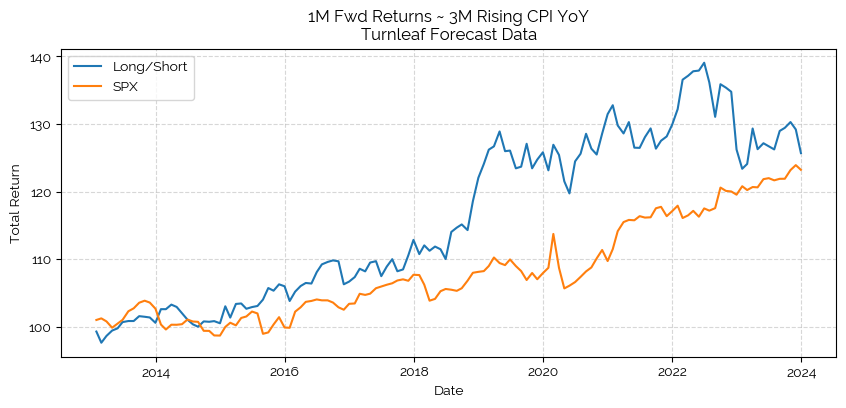

In [118]:
rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5cond'] = 1
rising_weights['s5hlth'] = 1
rising_weights['s5indu'] = -1
rising_weights['s5finl'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5enrs'] = 1
falling_weights['s5indu'] = -1
falling_weights['s5hlth'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

xcol = '3m_rising_yoy'
rtn_col = 'rtn_1M'
title = "{} Fwd Returns ~ 3M Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""))
xlabel = 'Date'
ylabel = 'Total Return'
# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
strat_rtn = apply_trading_rule(dfXcpi, dfrtn, xcol, rtn_col, weights)
plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, 
                  rtn_col=rtn_col, weights=weights, 
                  save_plot=True, show_plot=True,
                 title=title, xlabel=xlabel, ylabel=ylabel)

In [313]:
pd.merge(dfrtn[rtn_col].reset_index(), 
         dfXcpi[xcol].reset_index(), 
         left_on='refmonthyear', 
         right_on='refmonthyear', 
         suffixes=('', '_y'),
         how='inner')

,date,refmonthyear,s5cond,s5cons,s5enrs,s5finl,s5hlth,s5indu,s5matr,s5tech,spx,date_y,3M_rising_yoy
0,1989-10-31,OCT.1989,-0.007617,-0.004227,-0.012301,0.001767,0.011773,-0.009507,-0.011278,-0.045538,-0.005037,1989-10-01,False
1,1989-11-30,NOV.1989,0.002848,0.003957,0.034017,-0.022036,-0.001804,0.015181,0.012773,-0.007488,0.008603,1989-11-01,False
2,1989-12-29,DEC.1989,0.004831,-0.025476,-0.032718,-0.011656,-0.004603,0.004918,0.011696,0.047776,0.001661,1989-12-01,True
3,1990-01-31,JAN.1990,0.013383,0.010835,0.034853,0.000332,0.012912,0.014361,0.000714,0.043359,0.013414,1990-01-01,True
4,1990-02-28,FEB.1990,0.038500,0.029325,0.012214,0.010126,0.029141,0.027437,0.029595,0.037174,0.025932,1990-02-01,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,2023-07-31,JUL.2023,-0.005563,-0.012552,-0.001677,-0.007332,0.006415,-0.012182,-0.028787,-0.067441,-0.019334,2023-07-01,False
406,2023-08-31,AUG.2023,0.016945,-0.005202,0.022005,0.001170,-0.001611,-0.023776,-0.009073,-0.039654,-0.004152,2023-08-01,False
407,2023-09-29,SEP.2023,-0.000766,-0.030389,-0.020427,-0.003784,0.013286,0.010154,-0.005925,0.037992,0.011537,2023-09-01,True
408,2023-10-31,OCT.2023,0.063104,0.013012,-0.029199,0.040297,0.028589,0.030001,0.013998,0.063810,0.045285,2023-10-01,True


# Strategy 2: Long/Short top 2 tickers 
Rising 3Mth inflation ~ 3Mth Return:  
    Long Tech  ```s5tech```  
    Long Fins  ```s5finl```  
    Short Energy  ```s5enrs```  
    Short Industrials  ```s5indu```  

Falling 3Mth inflation ~ 3Mth Return:  
    Long Energy  ```s5enrs```  
    Long Tech  ```s5tech```  
    Short Fins  ```s5finl```  
    Short Cons Staples  ```s5cons```  

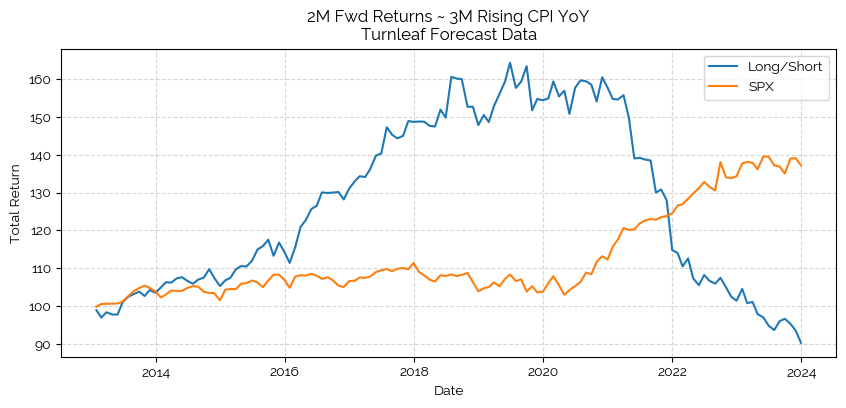

In [120]:
rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5hlth'] = 1
rising_weights['s5matr'] = 1
rising_weights['s5indu'] = -1
rising_weights['s5enrs'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5finl'] = 1
falling_weights['s5hlth'] = -1
falling_weights['s5indu'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

# title = "3M Fwd Returns ~ 3M Rising CPI YoY"
rtn_col = 'rtn_2M'
title = "{} Fwd Returns ~ 3M Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""))
xlabel = 'Date'
ylabel = 'Total Return'

xcol = '3m_rising_yoy'

# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, 
                  show_plot=True, title=title, xlabel=xlabel, ylabel=ylabel)

# Strategy 3

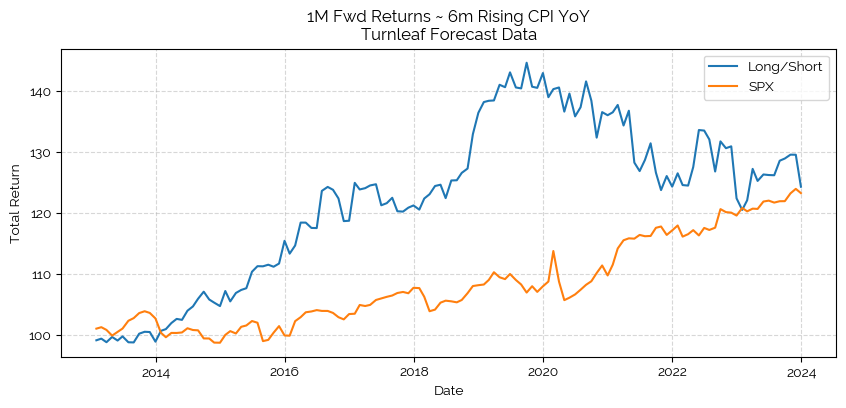

In [124]:
rtn_col = 'rtn_1M'
xcol = '6m_rising_yoy'

rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5tech'] = 1
rising_weights['s5hlth'] = 1
rising_weights['s5indu'] = -1
rising_weights['s5enrs'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5enrs'] = 1
falling_weights['s5hlth'] = -1
falling_weights['s5finl'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

# title = "3M Fwd Returns ~ 3M Rising CPI YoY"

title = "{} Fwd Returns ~ {} Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""), xcol.replace("_rising_yoy", ""))
xlabel = 'Date'
ylabel = 'Total Return'



# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, 
                  show_plot=True, title=title, xlabel=xlabel, ylabel=ylabel)

# Strategy 4

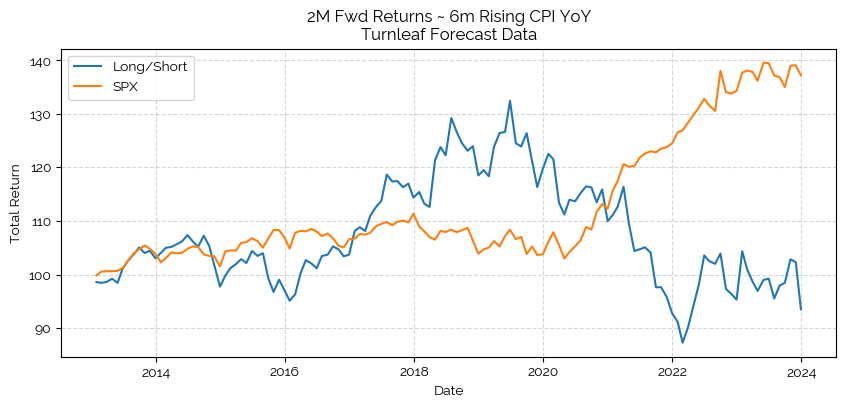

In [133]:
rtn_col = 'rtn_2M'
xcol = '6m_rising_yoy'

rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5tech'] = 1
rising_weights['s5finl'] = 1
rising_weights['s5indu'] = -1
rising_weights['s5enrs'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5cond'] = 1
falling_weights['s5hlth'] = -1
falling_weights['s5cons'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

# title = "3M Fwd Returns ~ 3M Rising CPI YoY"

title = "{} Fwd Returns ~ {} Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""), xcol.replace("_rising_yoy", ""))
xlabel = 'Date'
ylabel = 'Total Return'



# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, 
                  show_plot=True, title=title, xlabel=xlabel, ylabel=ylabel)

# Strategy 5

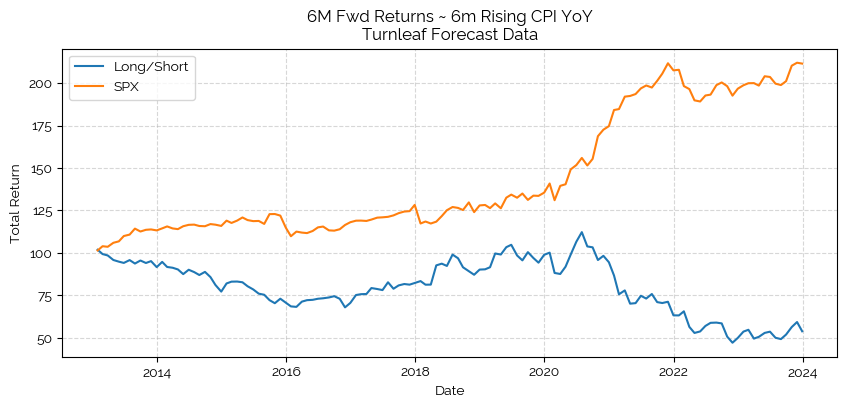

In [135]:
rtn_col = 'rtn_6M'
xcol = '6m_rising_yoy'

rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5tech'] = 1
rising_weights['s5hlth'] = 1
rising_weights['s5finl'] = -1
rising_weights['s5indu'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5cond'] = 1
falling_weights['s5hlth'] = -1
falling_weights['s5cons'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

# title = "3M Fwd Returns ~ 3M Rising CPI YoY"

title = "{} Fwd Returns ~ {} Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""), xcol.replace("_rising_yoy", ""))
xlabel = 'Date'
ylabel = 'Total Return'



# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
plot_trading_rule(dfXcpi, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, 
                  show_plot=True, title=title, xlabel=xlabel, ylabel=ylabel)

# $\Delta cpi.yoy\$ ~ Mean Return x sector

In [89]:
dfX = pd.merge(left=dfX.reset_index(), right=dfXcpi.reset_index(), left_on='refmonthyear', right_on='refmonthyear', suffixes=(None, '_y'))
dfX.drop(columns=[x for x in dfX.columns if x.endswith("_y")], axis=1, inplace=True)

dfX.set_index(['date', 'refmonthyear'], inplace=True)

In [90]:
dfrtn2 = dfrtn.stack(future_stack=True).reset_index()
head(dfrtn2)

,date,refmonthyear,ticker,rtn_1M,rtn_2M,rtn_3M,rtn_4M,rtn_5M,rtn_6M,rtn_7M,rtn_8M,rtn_9M,rtn_10M,rtn_11M,rtn_12M
0,2013-01-31,JAN.2013,s5cond,0.005917,-0.006209,0.004698,0.006581,0.003808,0.011692,0.008648,0.012536,0.014692,0.014799,0.016159,0.020656
1,2013-01-31,JAN.2013,s5cons,0.007793,-0.001261,0.010075,0.011575,0.016928,0.016456,0.015432,0.013989,0.014904,0.016374,0.018719,0.029324
2,2013-01-31,JAN.2013,s5enrs,0.009260,-0.000314,0.006991,0.007270,0.003745,0.012026,0.006457,0.009619,0.013071,0.018949,0.008655,0.020413
3,2013-01-31,JAN.2013,s5finl,0.014057,0.000989,0.012444,0.014175,0.010275,0.013909,0.017585,0.025448,0.023223,0.026388,0.023113,0.031916
4,2013-01-31,JAN.2013,s5hlth,0.008277,-0.003263,0.008599,0.008035,0.004451,0.011419,0.009665,0.008154,0.007865,0.009759,0.012016,0.018625


In [91]:
rtn_col = 'rtn_1M'
xcol = '3M_rising_yoy'
dfrtn_cpi2 = pd.merge(dfrtn2, 
         dfXcpi.reset_index(), 
         left_on='refmonthyear', 
         right_on='refmonthyear', 
         suffixes=('', '_y'),
         how='inner').drop('date_y', axis='columns')

In [54]:
cpi_factors = ['3M_rising_yoy', '6M_rising_yoy', '9M_rising_yoy', '12M_rising_yoy']
rtn_cols = [f"rtn_{i+1}M" for i in range(12)]

# for rtncol in rtn_cols:
#     for xcol in cpi_factors:
#         dfrtn_cpi2[xcol] = pd.Categorical(dfrtn_cpi2[xcol], categories=[True, False], ordered=True)
#         strategies.factor_barplot(dfrtn_cpi2, factor_col = xcol, rtn_col = rtncol, save_plot=True, 
#                                   use_excess_returns=False, show_plot=False)

In [53]:
dfrtn_cpi2[dfrtn_cpi2.ticker == 'spx'].to_clipboard()

Changes since last call - updated signal to work on relative changes in YoY CPI instead of absolute -- now roughly 50/50 split between rising & falling regimes across CPI signal horizons. 

# Strategy 3: Long/Short top 2 tickers with CPI Signal v2
Rising 3Mth inflation ~ 3Mth Return:  
    Long Tech  ```s5tech```  
    Long Healthcare  ```s5hlth```  
    Short Energy  ```s5enrs```  
    Short Industrials  ```s5indu```  

Falling 3Mth inflation ~ 3Mth Return:  
    Long Tech  ```s5tech```  
    Long Fins  ```s5finl```  
    Short Healthcare  ```s5hlth```  
    Short Cons Staples  ```s5cons```  

In [113]:
xcol = '3m1m_rising_yoy'
rtn_col = 'rtn_3M'
title = "Excess {} Fwd Sector Returns ~ 3M Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""))
ylabel = "Excess {} Fwd Return".format(rtn_col.replace("rtn_", ""))
xlabel = "Sector Ticker"
# factor_barplot(dfrtn_cpi2, xcol, rtn_col, show_plot=True, save_plot=True, 
#                figsize=(10,4), ylabel=ylabel, xlabel=xlabel, title=title)

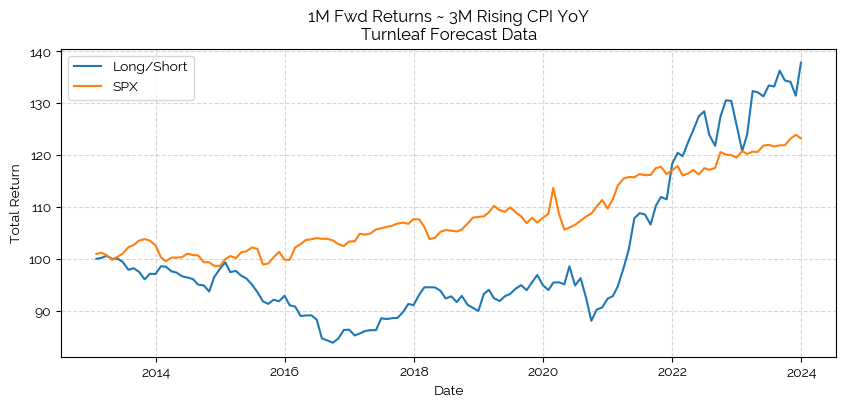

In [116]:
rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5enrs'] = 1
rising_weights['s5finl'] = 1
rising_weights['s5hlth'] = -1
rising_weights['s5indu'] = -1

falling_weights['s5hlth'] = 1
falling_weights['s5enrs'] = 1
falling_weights['s5cond'] = -1
falling_weights['s5indu'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

xcol = '3m_rising_yoy'
rtn_col = 'rtn_1M'

title = "{} Fwd Returns ~ 3M Rising CPI YoY\nTurnleaf Forecast Data".format(rtn_col.replace("rtn_", ""))
xlabel = 'Date'
ylabel = 'Total Return'
# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
# X = 
plot_trading_rule(dfX, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, 
                  save_plot=True, show_plot=True, title=title, xlabel=xlabel, ylabel=ylabel)

# Strategy 4: Long/Short top 2 tickers with CPI Signal v2, 3M Rtn ~ 6M CPI Rising
Rising 3Mth Return ~ 6Mth Inflation:  
    Long Tech  ```s5tech```  
    Long Healthcare  ```s5hlth```  
    Short Cons Disc  ```s5cond```  
    Short Industrials  ```s5indu```  

Falling 3Mth Return ~ 6Mth Inflation:  
    Long Tech  ```s5tech```  
    Long Cons Disc  ```s5cond```  
    Short Healthcare  ```s5hlth```  
    Short Cons Staples  ```s5cons```  

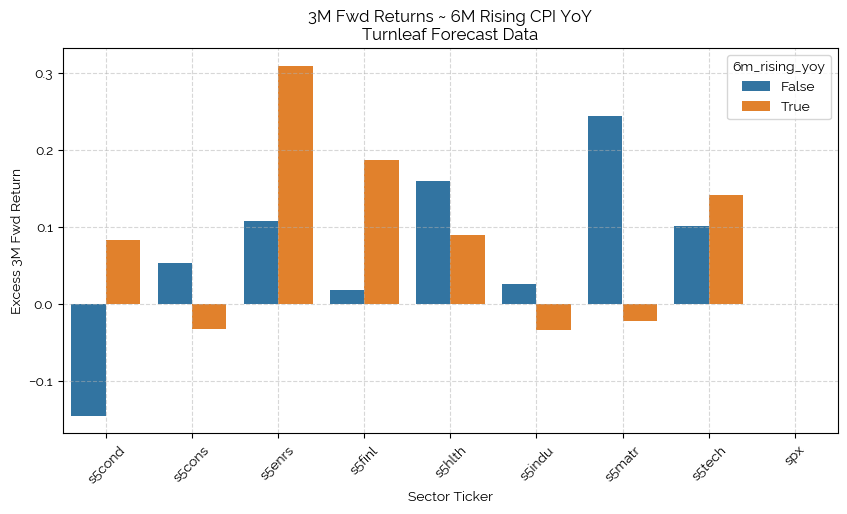

In [99]:
xcol = '6m_rising_yoy'
rtn_col = 'rtn_3M'
# rtn_cols=[f"rtn_{i+1}M" for i in range(12)]
# X = 
title = "3M Fwd Returns ~ 6M Rising CPI YoY\nTurnleaf Forecast Data"
ylabel = "Excess 3M Fwd Return"
xlabel = "Sector Ticker"
factor_barplot(dfrtn_cpi2, xcol, rtn_col, show_plot=True, save_plot=True, 
               figsize=(10,4), ylabel=ylabel, xlabel=xlabel, title=title)
# factor_barplot(dfrtn_cpi2, xcol, rtn_col, show_plot=True, save_plot=False)

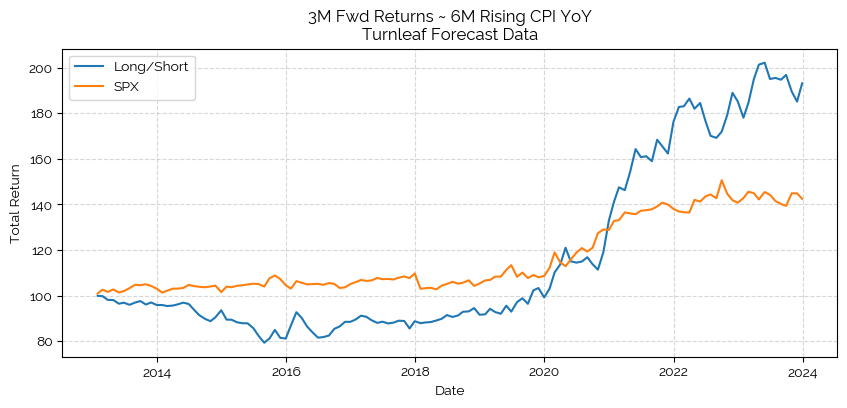

In [101]:
rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5enrs'] = 1
rising_weights['s5finl'] = 1
rising_weights['s5cons'] = -1
rising_weights['s5indu'] = -1

falling_weights['s5matr'] = 1
falling_weights['s5hlth'] = 1
falling_weights['s5cond'] = -1
falling_weights['s5finl'] = -1


weights[True] = rising_weights
weights[False] = falling_weights

title = "3M Fwd Returns ~ 6M Rising CPI YoY\nTurnleaf Forecast Data"
xlabel = 'Date'
ylabel = 'Total Return'

plot_trading_rule(dfX, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, show_plot=True, 
                  title=title, xlabel=xlabel, ylabel=ylabel)

# Strategy 5: Long/Short top 2 tickers with CPI Signal v2, 6M Rtn ~ 6M CPI Rising
Rising 6Mth Return ~ 6Mth Inflation:  
    Long Tech  ```s5tech```  
    Long Energy  ```s5enrs```  
    Short Fins  ```s5finl```  
    Short Cons Disc  ```s5cond```  

Falling 6Mth Return ~ 6Mth Inflation:  
    Long Tech  ```s5tech```  
    Long Fins  ```s5finl```  
    Short Healthcare  ```s5hlth```  
    Short Cons Staples  ```s5cons```  

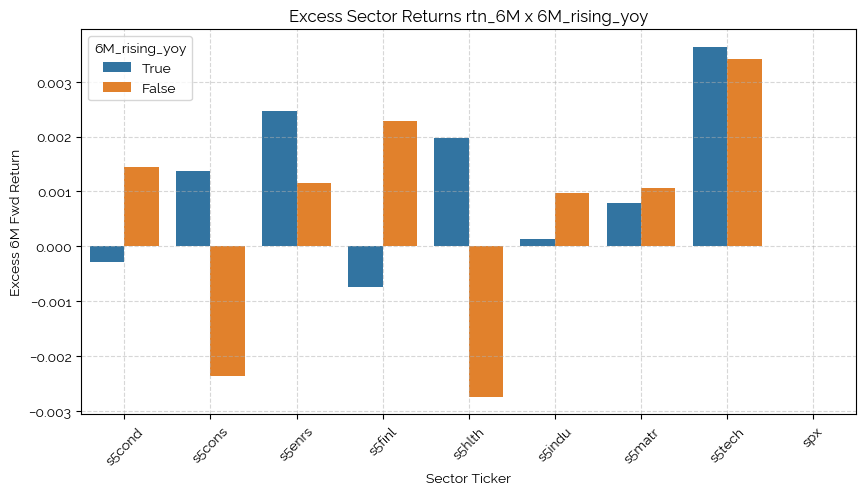

In [82]:
xcol = '6m_rising_yoy'
rtn_col = 'rtn_6M'
title = "6M Fwd Returns ~ 6M Rising CPI YoY"
ylabel = "Excess 6M Fwd Return"
xlabel = "Sector Ticker"

plt.rcParams['figure.figsize'] = (6,3)
factor_barplot(dfrtn_cpi2, xcol, rtn_col, show_plot=True, save_plot=False, 
               figsize=(6,3), ylabel=ylabel, xlabel=xlabel)

# factor_barplot(dfrtn_cpi2, xcol, rtn_col, show_plot=True, save_plot=True)

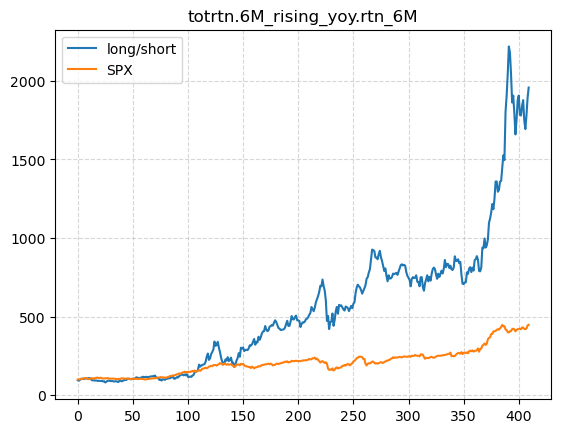

In [433]:
rising_weights = defaultdict(zero)
falling_weights = defaultdict(zero)
weights = defaultdict(zero)

rising_weights['s5tech'] = 1
rising_weights['s5enrs'] = 1
rising_weights['s5finl'] = -1
rising_weights['s5cond'] = -1

falling_weights['s5tech'] = 1
falling_weights['s5finl'] = 1
falling_weights['s5hlth'] = -1
falling_weights['s5cons'] = -1


weights[True] = rising_weights
weights[False] = falling_weights


plot_trading_rule(dfX, dfrtn, xcol=xcol, rtn_col=rtn_col, weights=weights, save_plot=True, show_plot=True)